<a href="https://colab.research.google.com/github/SainathReddy22/Anomaly-Detection/blob/main/Anomaly_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [2]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2021-03-30 09:27:42--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  13.0MB/s    in 0.8s    

2021-03-30 09:27:43 (13.0 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [3]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [4]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [5]:
data =pd.read_csv("ecg_final.txt",sep ="  ",header= None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data= data.add_prefix("c")

In [7]:
data.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,-0.586326,-0.434430,-0.337621,-0.258235,-0.184443,-0.120015,-0.070396,-0.041849,-0.037049,-0.041243,-0.048908,-0.060176,-0.070725,-0.085491,-0.101144,-0.116070,-0.134461,-0.155811,-0.177542,-0.200685,-0.224244,-0.246686,-0.271476,-0.290321,-0.304461,-0.315111,-0.316851,-0.313070,-0.303238,...,0.946527,1.051337,1.138071,1.187551,1.201909,1.190866,1.154605,1.086347,0.986863,0.864419,0.720300,0.570000,0.428955,0.319734,0.242586,0.181059,0.134708,0.109781,0.093630,0.081028,0.065780,0.047326,0.025409,0.004531,-0.009790,-0.019087,-0.026208,-0.029561,0.000637,0.086588,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,0.592049,0.493606,0.426206,0.393553,0.382488,0.386315,0.400830,0.415267,0.423797,0.429734,0.434976,0.441768,0.447727,0.454600,0.461603,0.472726,0.483574,0.492048,0.503468,0.516169,0.530030,0.543061,0.552285,0.560649,0.564906,0.566459,0.560789,0.548964,0.536229,...,0.520027,0.574633,0.614855,0.623050,0.608319,0.582721,0.553923,0.531272,0.507226,0.485600,0.483479,0.511334,0.546391,0.565580,0.571998,0.573798,0.584480,0.589680,0.591613,0.597117,0.603953,0.610288,0.619812,0.633101,0.649239,0.667657,0.680713,0.693871,0.751844,0.920052,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.829471,-3.585866,-4.003401,-3.900724,-3.325329,...,-2.662170,-2.634950,-2.634768,-2.591663,-2.446476,-2.234175,-2.431403,-2.681604,-2.864706,-3.415656,-3.497624,-3.091282,-2.608510,-2.383204,-2.678883,-3.305661,-3.179590,-3.311559,-3.501555,-4.007212,-4.199563,-3.335678,-3.127603,-3.042532,-3.116177,-3.972320,-4.754057,-4.290016,-3.802469,-4.014642,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,-0.935730,-0.704797,-0.557938,-0.457267,-0.392099,-0.346567,-0.329879,-0.332123,-0.342879,-0.359587,-0.373523,-0.392615,-0.415157,-0.441247,-0.470702,-0.501586,-0.538227,-0.570103,-0.616792,-0.650610,-0.695386,-0.735151,-0.770997,-0.799982,-0.8121

In [8]:
train_data,test_data,train_labels,test_labels=train_test_split(data.values,data.values[:,0:1],test_size = 0.25,random_state =142)

In [9]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [10]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [11]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix("c").query("c0==0").values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix("c").query("c0>0").values[:,1:]

In [12]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix("c").query("c0==0").values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix("c").query("c0>0").values[:,1:]

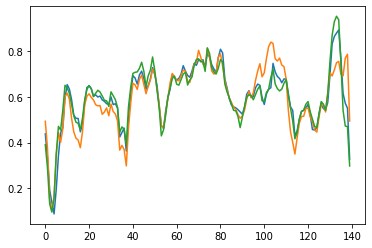

In [13]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[3])

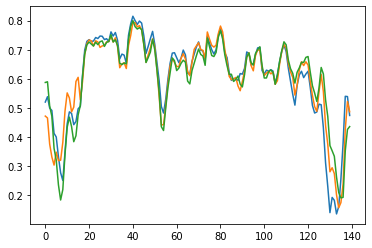

In [14]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[3])

In [22]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder,self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu')])
    self.decoder = tf.keras.Sequential([
         tf.keras.layers.Dense(16,activation='relu'),
         tf.keras.layers.Dense(32,activation='relu'),
         tf.keras.layers.Dense(64,activation='relu'),
         tf.keras.layers.Dense(140,activation='sigmoid'),                               
    ])
  def call(self,x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

In [23]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience =0,mode='min')
model.compile(optimizer ='adam',loss='mae')

In [25]:
history = model.fit(normal_train_data,normal_train_data,epochs=50,batch_size=120,
                    validation_data = (train_data_scaled[:,1:],train_data_scaled[:,1:]),
                    shuffle =True,callbacks =[early_stopping])

Epoch 1/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0317 - val_loss: 0.0545
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0538
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.0529
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.0524
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0289 - val_loss: 0.0522
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.0530


In [27]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [28]:
encoder_out.shape

(728, 8)

In [29]:
decoder_out.shape

(728, 140)

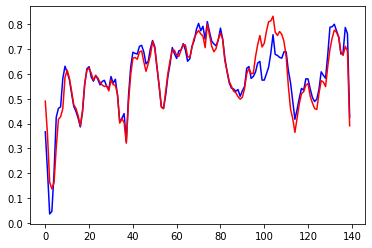

In [30]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [31]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()

In [32]:
decoder_out_a=model.decoder(encoder_out_a).numpy()

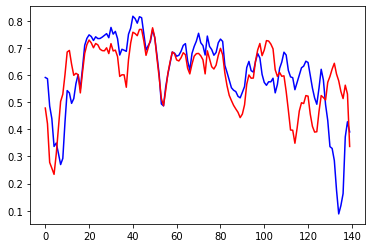

In [33]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

(array([10., 30., 55., 70., 88., 82., 73., 56., 38., 36., 31., 27., 22.,
        21., 15., 13.,  6., 12.,  8.,  4.,  3.,  4.,  3.,  3.,  3.,  3.,
         2.,  0.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01158759, 0.01361888, 0.01565017, 0.01768145, 0.01971274,
        0.02174403, 0.02377532, 0.02580661, 0.02783789, 0.02986918,
        0.03190047, 0.03393176, 0.03596305, 0.03799433, 0.04002562,
        0.04205691, 0.0440882 , 0.04611949, 0.04815077, 0.05018206,
        0.05221335, 0.05424464, 0.05627593, 0.05830721, 0.0603385 ,
        0.06236979, 0.06440108, 0.06643237, 0.06846365, 0.07049494,
        0.07252623, 0.07455752, 0.07658881, 0.07862009, 0.08065138,
        0.08268267, 0.08471396, 0.08674525, 0.08877653, 0.09080782,
        0.09283911, 0.0948704 , 0.09690169, 0.09893297, 0.10096426,
        0.10299555, 0.10502684, 0.10705813, 0.10908941, 0.1111207 ,
        0.11315199]),
 <a list of 50

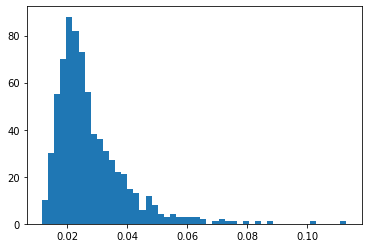

In [34]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions,normal_test_data)
plt.hist(train_loss,bins =50)

In [35]:
np.mean(train_loss)

0.02789220272782522

In [36]:
np.std(train_loss)

0.011994318311139372

In [37]:
threshold = np.mean(train_loss)+2*np.std(train_loss)

In [38]:
threshold

0.051880839350103965

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  2.,  6., 10.,
        22., 33., 47., 64., 71., 82., 62., 53., 28., 17.,  5.,  2.,  2.,
         1.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02322438, 0.02673935, 0.03025432, 0.03376928, 0.03728425,
        0.04079922, 0.04431418, 0.04782915, 0.05134412, 0.05485908,
        0.05837405, 0.06188901, 0.06540398, 0.06891895, 0.07243391,
        0.07594888, 0.07946385, 0.08297881, 0.08649378, 0.09000875,
        0.09352371, 0.09703868, 0.10055365, 0.10406861, 0.10758358,
        0.11109855, 0.11461351, 0.11812848, 0.12164345, 0.12515841,
        0.12867338, 0.13218834, 0.13570331, 0.13921828, 0.14273324,
        0.14624821, 0.14976318, 0.15327814, 0.15679311, 0.16030808,
        0.16382304, 0.16733801, 0.17085298, 0.17436794, 0.17788291,
        0.18139788, 0.18491284, 0.18842781, 0.19194278, 0.19545774,
        0.19897271]),
 <a list of 50

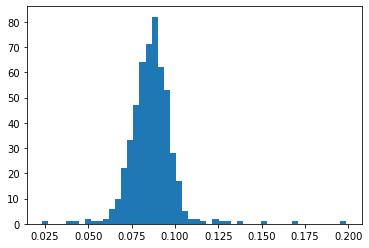

In [40]:
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a,anomaly_test_data)
plt.hist(train_loss_a,bins =50)

In [41]:
np.mean(train_loss_a)

0.08641259162536133

In [42]:
np.std(train_loss_a)

0.013046777124907049

In [44]:
threshold_a = np.mean(train_loss_a)+2*np.std(train_loss_a)
threshold_a

0.11250614587517543

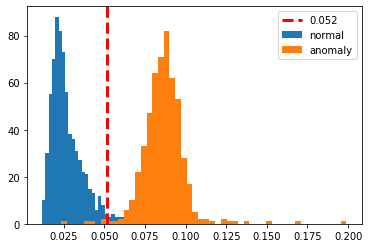

In [45]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='anomaly')
plt.axvline(threshold,color = 'r',linewidth =3,linestyle ='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc="upper right")
plt.show()

In [46]:
tf.math.less(train_loss,threshold)

<tf.Tensor: shape=(728,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [47]:
preds=tf.math.less(train_loss,threshold)

In [48]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=696>

In [49]:
preds.shape

TensorShape([728])

In [50]:
preds_a = tf.math.greater(train_loss_a,threshold)

In [51]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=517>

In [52]:
preds_a.shape

TensorShape([522])